**классификатор картинок MLP на Keras+TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.python.client import device_lib

import keras 

import matplotlib.pyplot as plt
# import os

Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.2


---

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15779677820848900147
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12513469264883906767
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14128907289836150398
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1344012288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18308159885862928187
physical_device_desc: "device: 0, name: GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5"
]


In [4]:
dev = tf.test.gpu_device_name()
print('Default GPU Device:',dev)

Default GPU Device: /device:GPU:0


In [5]:
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# # sess.list_devices()

In [6]:
print(tf.test.is_built_with_cuda())

True


---

In [7]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [8]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [10]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

In [12]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
%%time

model.fit(train_images, train_labels, epochs=5)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.5006 - acc: 0.8209
Epoch 2/5
60000/60000 [==============================] - 16s 260us/step - loss: 0.3854 - acc: 0.8582
Epoch 3/5
60000/60000 [==============================] - 15s 250us/step - loss: 0.3517 - acc: 0.8702
Epoch 4/5
60000/60000 [==============================] - 15s 255us/step - loss: 0.3311 - acc: 0.8770
Epoch 5/5
60000/60000 [==============================] - 15s 250us/step - loss: 0.3143 - acc: 0.8846
CPU times: user 1min 1s, sys: 19.3 s, total: 1min 20s
Wall time: 1min 17s


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.8771


In [17]:
p = model.predict(test_images)
r = np.argmax(p,axis=1)
n=test_images.shape[1]

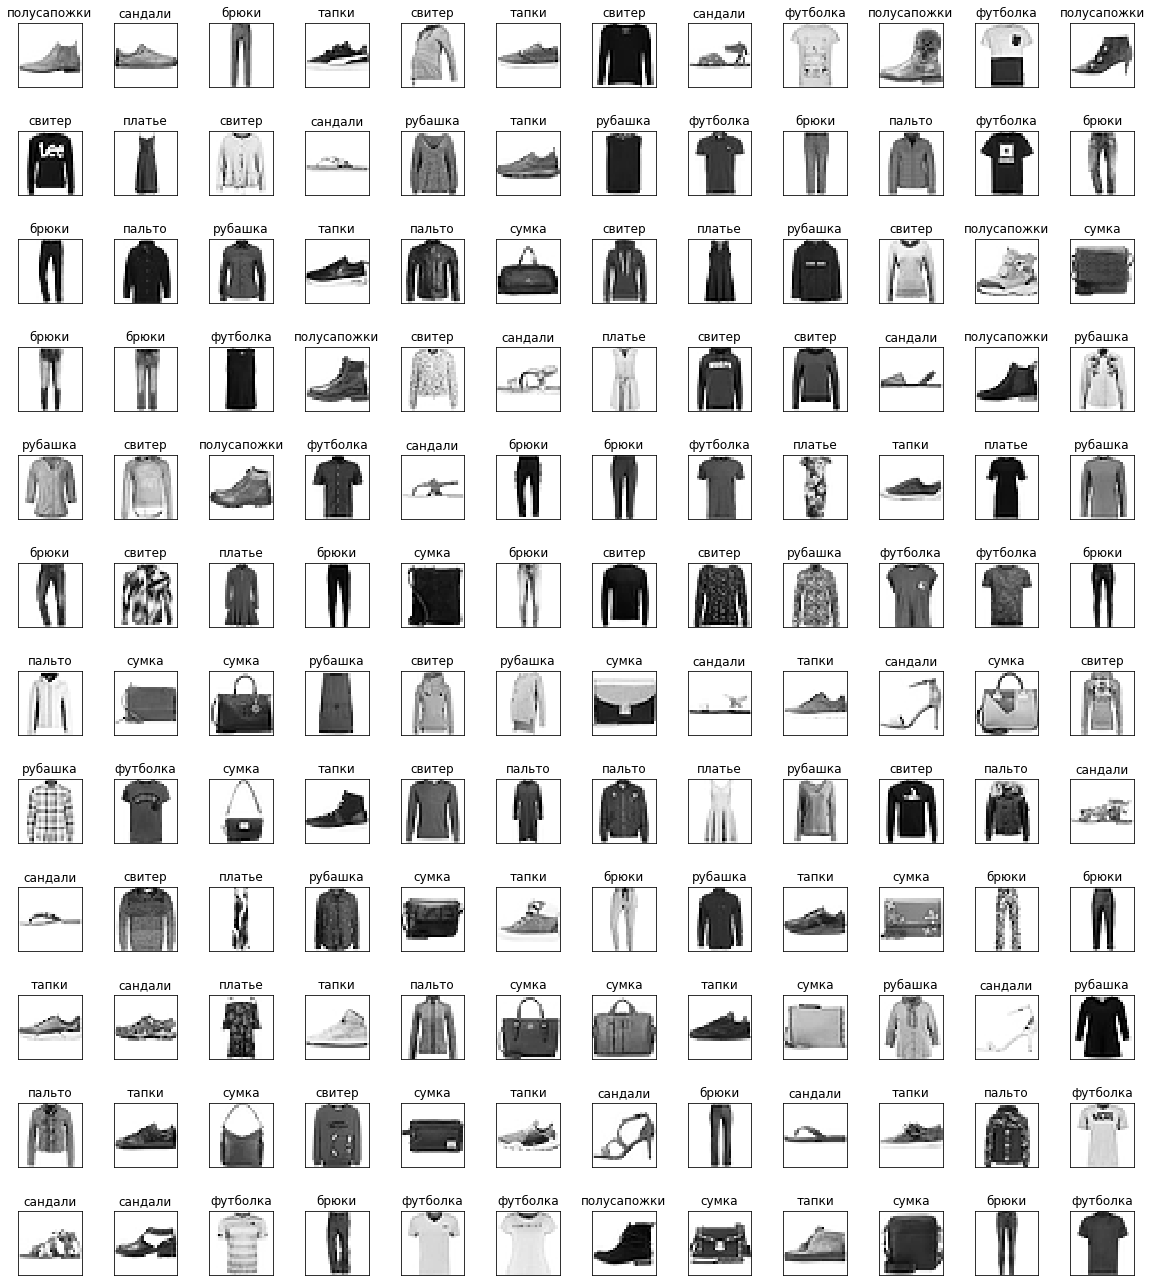

In [18]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].set_title(class_names[r[k]])
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        # axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.plasma)
        axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.Greys)
        
        
        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()